# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [4]:
#your turn
print(df_transactions.shape)
print(df_offers.shape)

(324, 3)
(32, 7)


In [5]:
df_offers['offer_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [6]:
# create one column for each offer. Below code generates column names
coln = []
for i in range(1,33):
    coln.append('offer_' + str(i))
print(coln)

['offer_1', 'offer_2', 'offer_3', 'offer_4', 'offer_5', 'offer_6', 'offer_7', 'offer_8', 'offer_9', 'offer_10', 'offer_11', 'offer_12', 'offer_13', 'offer_14', 'offer_15', 'offer_16', 'offer_17', 'offer_18', 'offer_19', 'offer_20', 'offer_21', 'offer_22', 'offer_23', 'offer_24', 'offer_25', 'offer_26', 'offer_27', 'offer_28', 'offer_29', 'offer_30', 'offer_31', 'offer_32']


In [7]:
# make a long table to a wide table using 'pivot'. Fill NaN's by 0. Reset index of the transformed dataframe to 
# make customer_name a column rather than the index. Must have inplace=True for the reset_index to work on the 
# original dataframe
df_transformed = df_transactions.pivot(index='customer_name', columns='offer_id', values='n')
df_transformed.columns = coln
df_transformed.fillna(0,inplace=True)
df_transformed.reset_index(inplace=True)
display(df_transformed.head())
print(df_transformed.shape)

,customer_name,offer_1,offer_2,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8,offer_9,...,offer_23,offer_24,offer_25,offer_26,offer_27,offer_28,offer_29,offer_30,offer_31,offer_32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


(100, 33)


In [8]:
# sanity check 1 customer name 'Smith'. The customer responded to offer 2 and 24
df_transformed[df_transformed['customer_name']=='Smith']

,customer_name,offer_1,offer_2,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8,offer_9,...,offer_23,offer_24,offer_25,offer_26,offer_27,offer_28,offer_29,offer_30,offer_31,offer_32
83,Smith,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# merge the columns of 2 tables
new_df = df_transactions.merge(df_offers, left_on='offer_id', right_on='offer_id')

In [10]:
display(new_df.head())
print(new_df.shape)

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak
0,Smith,2,1,January,Pinot Noir,72,17,France,False
1,Rodriguez,2,1,January,Pinot Noir,72,17,France,False
2,Martin,2,1,January,Pinot Noir,72,17,France,False
3,Jackson,2,1,January,Pinot Noir,72,17,France,False
4,Campbell,2,1,January,Pinot Noir,72,17,France,False


(324, 9)


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

## Answers:
Smaller SS represent better clusterings. Because smaller SS meaning the points in the same cluster are closer 
and more concentrated around the centroids of each cluster.
Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 

In [11]:
# your turn
data_need = df_transformed.iloc[:,1:]
display(data_need.head())
x_cols = data_need.values
print(x_cols[:2,])

,offer_1,offer_2,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8,offer_9,offer_10,...,offer_23,offer_24,offer_25,offer_26,offer_27,offer_28,offer_29,offer_30,offer_31,offer_32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:
# Write code that applies the [`KMeans`] clustering method from scikit-learn to this matrix. 
# Construct a plot showing 𝑆𝑆 for each 𝐾 and pick 𝐾 using this plot. For simplicity, test 2≤𝐾≤10. 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
center = []
keepinertia = []  # this is SS
labs = []
total_niter = []
for K in range(2,11):
    km = sklearn.cluster.KMeans(n_clusters=K, random_state=123)
    km.fit(x_cols)
    center.append(km.cluster_centers_)
    #print(len(center))
    labs.append(km.labels_)
    keepinertia.append(km.inertia_)
    total_niter.append(km.n_iter_)

print([keepinertia,total_niter])
#print(center)
#print(labs)

[[251.76, 227.625, 215.42570806100218, 205.27944664031617, 196.29624542124543, 188.21875346875345, 180.35722116119177, 174.21212121212122, 167.1938596491228], [5, 12, 6, 5, 7, 6, 5, 3, 3]]


In [13]:
ss = pd.DataFrame(keepinertia)
ss.rename(columns = {0:'SS'}, inplace = True) 
ss['K'] = range(2,11)
ss

,SS,K
0,251.760000,2
1,227.625000,3
2,215.425708,4
3,205.279447,5
4,196.296245,6
5,188.218753,7
6,180.357221,8
7,174.212121,9
8,167.193860,10


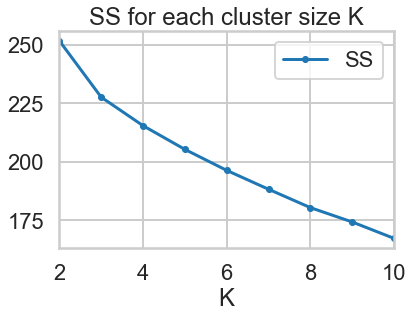

In [14]:
ax = plt.gca()
ss.plot(kind='line', x='K', y='SS',ax=ax, marker='.')
plt.title('SS for each cluster size K')
plt.show()

0    48
2    36
1    16
dtype: int64


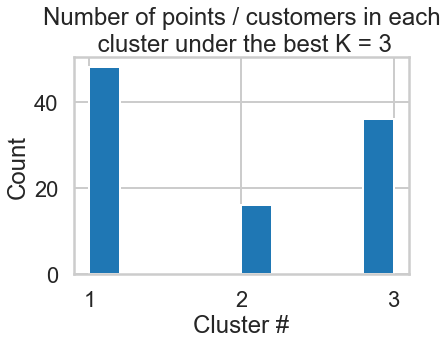

In [15]:
# Make a bar chart showing the number of points in each cluster for k-means under the best 𝐾. 
# choose K = 3 as the best cluster size
# labs[1] corresponds to the labels when K = 3
# cluster 0 has 48 customers, cluster 1 has 16 customers, cluster 2 has 36 customers
print(pd.Series(labs[1]).value_counts())
import numpy as np
pd.Series(labs[1]).hist()
plt.xticks(np.arange(0,3), ('1','2','3'))
plt.xlabel('Cluster #')
plt.ylabel('Count')
plt.title('Number of points / customers in each\n cluster under the best K = 3')
plt.show()

## What challenges did you experience using the Elbow method to pick 𝐾? 
## Answer:
Challenge is when selecting the best K based on SS values, the drops in SS are quite similar for each increment 
in K, there's not really an "Elbow" point.

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.08206113079944462
For n_clusters = 3 The average silhouette_score is : 0.12101628521627421
For n_clusters = 4 The average silhouette_score is : 0.12416494377606797
For n_clusters = 5 The average silhouette_score is : 0.11593800645322037
For n_clusters = 6 The average silhouette_score is : 0.1319407030176781
For n_clusters = 7 The average silhouette_score is : 0.09894629408384592
For n_clusters = 8 The average silhouette_score is : 0.12990584815609205
For n_clusters = 9 The average silhouette_score is : 0.11496043578541626
For n_clusters = 10 The average silhouette_score is : 0.13507870304456204


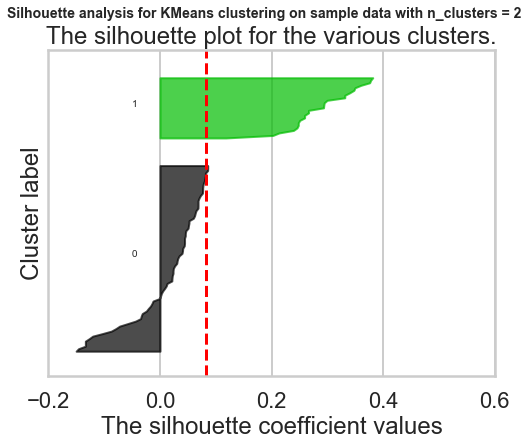

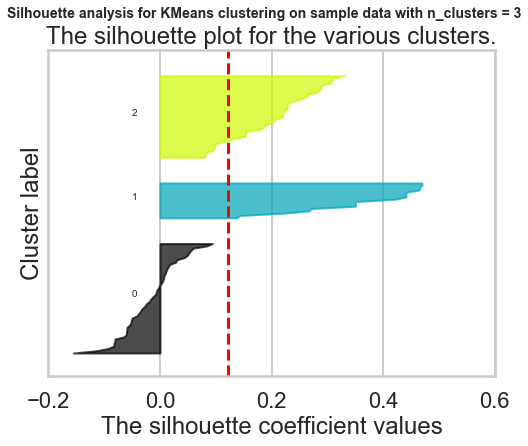

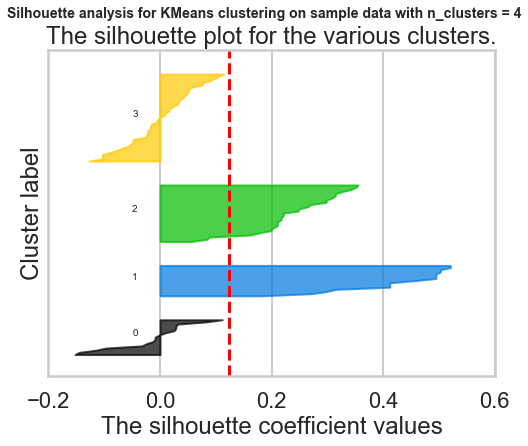

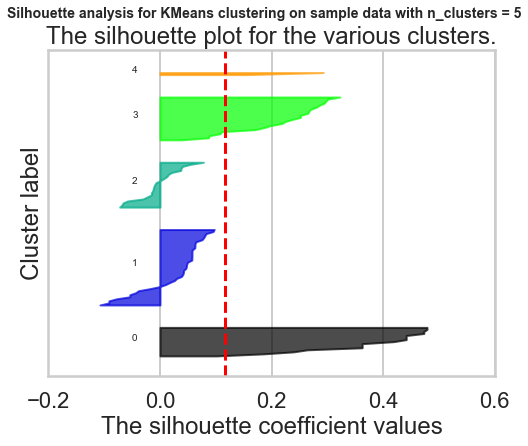

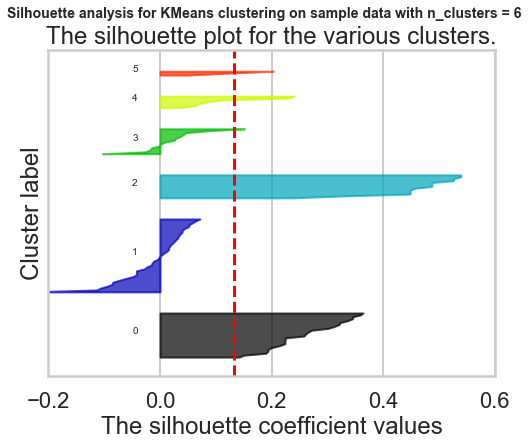

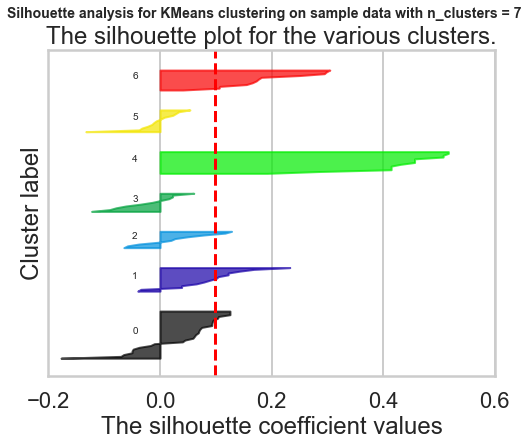

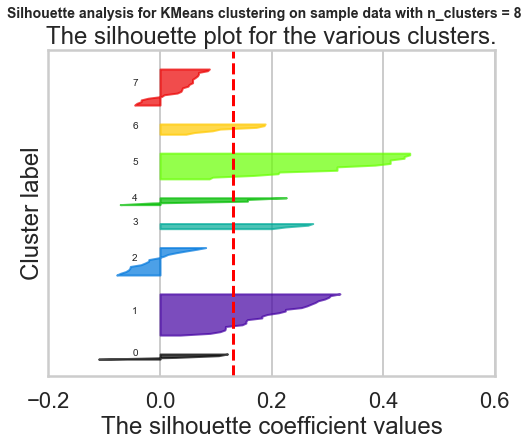

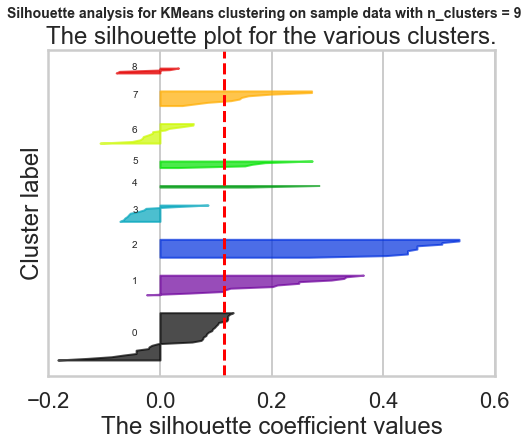

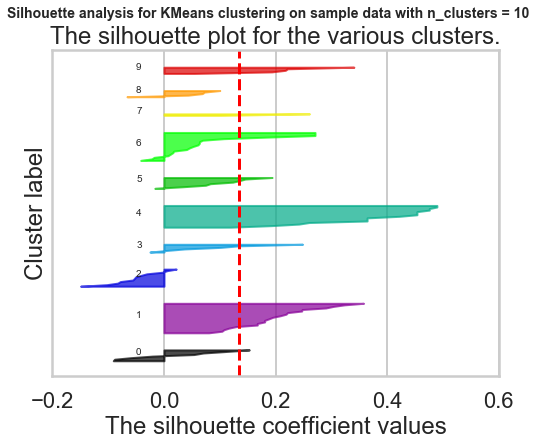

In [17]:
# Your turn.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    plt.figure(figsize=(8,6))
    ax1 = plt.gca()
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.2, 0.6])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_cols) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(x_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Compute the average silhouette score for each 𝐾 and plot it. What 𝐾 does the plot suggest we should choose? Does it differ from what we found using the Elbow method?

## Answer:
Based on the output average silhouette_score, K = 10 seems to be a good choice (highest score and similar thickness for different clusters)

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [18]:
#your turn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_cols)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
# The singular values corresponding to each of the selected components. 
# The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.
print(pca.singular_values_)
# Principal axes in feature space, representing the directions of maximum variance in the data. 
# The components are sorted by explained_variance_.
print(pca.components_)
print(pca.mean_)

[0.4096489  0.30753551]
[0.14386393 0.10800289]
[6.36829969 5.51779083]
[[-1.61685077e-01 -1.30215063e-01 -1.84050593e-02 -1.75254977e-01
  -6.71199120e-02 -1.53633007e-01  3.43672871e-01  3.32419546e-01
  -1.36167969e-01 -5.26447239e-02 -1.61805935e-01 -2.56376321e-02
   1.80935307e-01 -1.33907190e-01 -1.14720579e-01 -3.22645660e-02
  -6.96938803e-02  2.71425446e-01  1.33030665e-04 -9.33371491e-02
  -9.54554593e-03 -2.20113686e-01 -7.94434100e-02 -1.18974084e-01
  -5.22674866e-02 -2.22019827e-01 -1.00333136e-01 -3.91817202e-02
   3.80350120e-01  4.06842531e-01 -1.51939820e-01 -5.43808433e-02]
 [-8.24683263e-02  1.93015011e-01 -1.16619233e-01 -1.55288030e-01
  -1.76514596e-03 -2.65392065e-01 -1.25240657e-01 -1.16386245e-01
  -5.10187902e-02 -8.88374252e-02 -9.23927062e-02  7.06174903e-03
  -6.76688926e-03 -8.97986073e-02 -9.48767029e-02  7.28049722e-03
   2.75093525e-01 -9.53781102e-03 -1.23051435e-01 -3.72086938e-02
  -5.83598747e-02 -4.43740078e-01 -4.30889972e-02  4.45110718e-01
  -

In [19]:
# use the K = 3 recommendation I have in previous exercise to cluster customers
print(labs[1])

[2 0 1 2 0 0 1 2 0 2 0 1 2 0 2 1 0 1 2 0 2 2 0 0 1 0 0 0 0 1 2 2 0 0 2 2 0
 2 0 2 1 1 2 0 2 0 2 2 0 0 0 0 0 1 0 2 1 2 2 0 0 2 0 2 2 1 1 0 0 0 0 0 0 2
 0 2 1 2 2 1 0 0 0 1 2 2 2 0 0 2 0 2 0 2 0 0 2 0 0 0]


In [20]:
# do matrix multiplication using the 100*32 original matrix to multiply the pca.components_ (32*2) to get 100*2 matrix
# which corresponds to 'x' and 'y' 
comp = pca.components_
print(x_cols.shape)
print(comp.shape)
m = pca.mean_
print(m.shape)

(100, 32)
(2, 32)
(32,)


In [21]:
x_cols[99]-m

array([-0.1 , -0.1 , -0.06, -0.12, -0.04,  0.88, -0.19, -0.2 ,  0.9 ,
       -0.07, -0.13, -0.05, -0.06, -0.09,  0.94, -0.05, -0.07, -0.14,
       -0.05, -0.06, -0.04,  0.79, -0.05, -0.12, -0.06, -0.15, -0.09,
       -0.06, -0.17, -0.22,  0.83,  0.96])

In [22]:
comp[0]

array([-1.61685077e-01, -1.30215063e-01, -1.84050593e-02, -1.75254977e-01,
       -6.71199120e-02, -1.53633007e-01,  3.43672871e-01,  3.32419546e-01,
       -1.36167969e-01, -5.26447239e-02, -1.61805935e-01, -2.56376321e-02,
        1.80935307e-01, -1.33907190e-01, -1.14720579e-01, -3.22645660e-02,
       -6.96938803e-02,  2.71425446e-01,  1.33030665e-04, -9.33371491e-02,
       -9.54554593e-03, -2.20113686e-01, -7.94434100e-02, -1.18974084e-01,
       -5.22674866e-02, -2.22019827e-01, -1.00333136e-01, -3.91817202e-02,
        3.80350120e-01,  4.06842531e-01, -1.51939820e-01, -5.43808433e-02])

In [23]:
len(comp[0])

32

In [24]:
comp[1]

array([-0.08246833,  0.19301501, -0.11661923, -0.15528803, -0.00176515,
       -0.26539207, -0.12524066, -0.11638624, -0.05101879, -0.08883743,
       -0.09239271,  0.00706175, -0.00676689, -0.08979861, -0.0948767 ,
        0.0072805 ,  0.27509352, -0.00953781, -0.12305143, -0.03720869,
       -0.05835987, -0.44374008, -0.043089  ,  0.44511072, -0.02204264,
        0.40164094, -0.09590645, -0.03822804,  0.01505404, -0.08894132,
       -0.32620567, -0.05219467])

In [25]:
len(x_cols[0])

32

In [26]:
x_cols[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [27]:
x_cols[99]

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.])

In [28]:
sum(x_cols[99]*comp[0])

-0.8309559048619675

In [29]:
# do inner product of the x_cols matrix and pricipal axis direction to project down to the 2D space for 
# all of the 100 customers 
# res[:,0] column is 'x' and res[:,1] column is 'y'
# note: checking the PCA documentation in sklearn it says the fit_transform method subtracts the mean, no scaling is done
# so, to get the same results as fit_transform method, need to subtract the mean vector first
res = np.zeros((100,2))
for i in range(x_cols.shape[0]):
    res[i,0] = sum((x_cols[i]-m)*comp[0])
    res[i,1] = sum((x_cols[i]-m)*comp[1])
print(res)
print(res.shape)

[[ 1.00757996e+00  1.08214665e-01]
 [-2.87539237e-01  4.47145141e-02]
 [-3.92032043e-01  1.03839141e+00]
 [ 6.99477269e-01 -2.25422232e-02]
 [ 8.81832248e-02 -4.71695431e-01]
 [-4.85281909e-01 -7.25503292e-01]
 [-5.91940987e-01  1.50649994e+00]
 [ 6.61731534e-01  9.03075520e-02]
 [-1.18943267e-01 -5.77498507e-01]
 [ 1.07982739e+00 -7.48818111e-03]
 [-2.40431061e-01 -6.17026041e-01]
 [-5.22247106e-01  1.23140642e+00]
 [ 1.26076270e+00 -1.42550704e-02]
 [-5.79220584e-01 -4.20474690e-01]
 [ 1.93998464e-01  1.03057282e-02]
 [-3.92032043e-01  1.03839141e+00]
 [-4.06275667e-01 -4.57711391e-02]
 [-5.91940987e-01  1.50649994e+00]
 [ 7.36154519e-01  1.17752476e-01]
 [-3.49056937e-01 -2.67081210e-01]
 [ 1.41224694e+00 -1.23874426e-01]
 [ 1.81048277e-01 -2.06529405e-02]
 [-3.71484955e-01 -3.48006774e-01]
 [-5.09136903e-01 -6.87321373e-01]
 [-2.39706096e-01  9.11843998e-01]
 [-7.82355465e-01 -5.18475045e-01]
 [-2.99665902e-01  6.96444453e-03]
 [-4.12829546e-01 -1.21989471e-02]
 [-3.39145922e-01 -1

In [30]:
# actually can use this fit_transform in sklearn to get the projections directly
pca.fit_transform(x_cols)

array([[ 1.00757996e+00,  1.08214665e-01],
       [-2.87539237e-01,  4.47145141e-02],
       [-3.92032043e-01,  1.03839141e+00],
       [ 6.99477269e-01, -2.25422232e-02],
       [ 8.81832248e-02, -4.71695431e-01],
       [-4.85281909e-01, -7.25503292e-01],
       [-5.91940987e-01,  1.50649994e+00],
       [ 6.61731534e-01,  9.03075520e-02],
       [-1.18943267e-01, -5.77498507e-01],
       [ 1.07982739e+00, -7.48818111e-03],
       [-2.40431061e-01, -6.17026041e-01],
       [-5.22247106e-01,  1.23140642e+00],
       [ 1.26076270e+00, -1.42550704e-02],
       [-5.79220584e-01, -4.20474690e-01],
       [ 1.93998464e-01,  1.03057282e-02],
       [-3.92032043e-01,  1.03839141e+00],
       [-4.06275667e-01, -4.57711391e-02],
       [-5.91940987e-01,  1.50649994e+00],
       [ 7.36154519e-01,  1.17752476e-01],
       [-3.49056937e-01, -2.67081210e-01],
       [ 1.41224694e+00, -1.23874426e-01],
       [ 1.81048277e-01, -2.06529405e-02],
       [-3.71484955e-01, -3.48006774e-01],
       [-5.

In [31]:
print(labs[1].shape)
print(res.shape)
custID = labs[1][np.newaxis]
#print(custID.T)
print(custID.T.shape)

(100,)
(100, 2)
(100, 1)


In [32]:
# concatenate x,y columns and clusterID columns, next step is to concatenate the customer name column
attr = np.concatenate((custID.T,res), axis=1)
#print(attr)
attr_df = pd.DataFrame(attr)
attr_df.columns = ['cluster_ID','x','y']
attr_df.head()

,cluster_ID,x,y
0,2.0,1.007580,0.108215
1,0.0,-0.287539,0.044715
2,1.0,-0.392032,1.038391
3,2.0,0.699477,-0.022542
4,0.0,0.088183,-0.471695


In [33]:
name_df = pd.DataFrame(df_transformed['customer_name'])
display(name_df.head())
type(name_df)
frames = [name_df, attr_df]
final_df = pd.concat(frames,sort=False,axis=1)
display(final_df.head())

,customer_name
0,Adams
1,Allen
2,Anderson
3,Bailey
4,Baker


,customer_name,cluster_ID,x,y
0,Adams,2.0,1.007580,0.108215
1,Allen,0.0,-0.287539,0.044715
2,Anderson,1.0,-0.392032,1.038391
3,Bailey,2.0,0.699477,-0.022542
4,Baker,0.0,0.088183,-0.471695


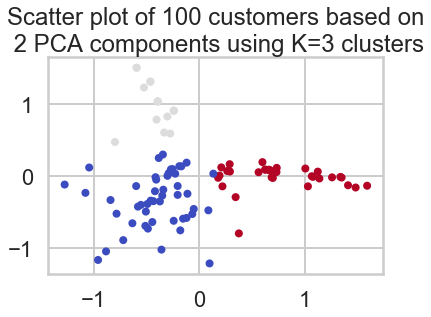

In [34]:
plt.scatter(x=final_df['x'], y=final_df['y'], marker='.', c=final_df['cluster_ID'], 
            cmap=plt.cm.coolwarm)
plt.title('Scatter plot of 100 customers based on\n 2 PCA components using K=3 clusters')
plt.show()

## How do the clusters look? Based on what you see, what seems to be the best value for 𝐾. Moreover, which method of choosing 𝐾 seems to have produced the optimal result visually? 
## Answers:
K=3 clusters visually looks good. The Elbow method seems to produced the optimal K

## Exercise: Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?

In [35]:
# merge new_df with the final_df dataframe by customer_name
exp_df = new_df.merge(final_df, left_on='customer_name', right_on='customer_name')
display(exp_df.head())
print(exp_df.shape)

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak,cluster_ID,x,y
0,Smith,2,1,January,Pinot Noir,72,17,France,False,1.0,-0.300227,0.829765
1,Smith,24,1,September,Pinot Noir,6,34,Italy,False,1.0,-0.300227,0.829765
2,Rodriguez,2,1,January,Pinot Noir,72,17,France,False,1.0,-0.403273,0.786296
3,Rodriguez,26,1,October,Pinot Noir,144,83,Australia,False,1.0,-0.403273,0.786296
4,Martin,2,1,January,Pinot Noir,72,17,France,False,0.0,-0.382241,0.254034


(324, 12)


For customers in the same cluster_ID, examine each of the variables
The clusters separates out varietal in such a way that cluster 0 are mainly Champagne,
Cabernet Sauvignon, Prosecco and Chardonnay, whereas cluster 1 is mainly Pinot Noir, and 
cluster 2 is mainly Espumante, Prosecco, Malbec and Pinot Grigio

In [36]:
exp_df.groupby(['cluster_ID'])['varietal'].value_counts()

cluster_ID  varietal          
0.0         Champagne             74
            Cabernet Sauvignon    31
            Prosecco              21
            Chardonnay            14
            Malbec                14
            Merlot                13
            Espumante              8
            Pinot Noir             7
            Pinot Grigio           1
1.0         Pinot Noir            37
            Prosecco               2
            Champagne              1
            Chardonnay             1
            Malbec                 1
            Merlot                 1
2.0         Espumante             32
            Prosecco              20
            Malbec                17
            Pinot Grigio          16
            Champagne              6
            Merlot                 6
            Cabernet Sauvignon     1
Name: varietal, dtype: int64

The clusters don't separate out by campaign months very well. It can be seen that there's mixture of campaign months in different clusters.

In [37]:
exp_df.groupby(['cluster_ID'])['campaign'].value_counts()

cluster_ID  campaign 
0.0         August       28
            December     26
            February     20
            June         19
            March        17
            October      16
            May          15
            April        14
            January      13
            November      6
            July          5
            September     4
1.0         October      13
            September    13
            January       7
            July          7
            April         1
            June          1
            May           1
2.0         March        34
            December     17
            November     17
            July         14
            May           8
            August        3
            April         2
            February      2
            October       1
Name: campaign, dtype: int64

The clusters separates out offer_id in such a way that cluster 0 are mainly 22, 31, 4, 11, 6, 9, cluster 1 is mainly
24, 26, 27, 2, whereas cluster 2 is mainly 8, 30, 7, 29, 18, 13. These are all non overlapping offer_id's. This is
expected because the 3 clusters come from the KMeans using offer_1,...offer_32 attributes.

In [38]:
exp_df.groupby(['cluster_ID'])['offer_id'].value_counts()

cluster_ID  offer_id
0.0         22          20
            31          17
            4           12
            11          12
            6           11
            9           10
            1            9
            14           9
            27           7
            15           6
            20           6
            25           6
            28           5
            30           5
            2            4
            3            4
            5            4
            10           4
            16           4
            19           4
            23           4
            32           4
            7            3
            8            3
            12           3
            26           3
            21           2
            18           1
            29           1
1.0         24          12
            26          12
            17           7
            2            6
            1            1
            10           1
            12           1
       

Cluster 0 has the largest quantity. cluster 2 has the lowest and cluster 1 is in between. There's not a big distinction between cluster 1 and 2.

In [39]:
exp_df.groupby(['cluster_ID'])['min_qty'].sum()

cluster_ID
0.0    14682
1.0     2820
2.0     1422
Name: min_qty, dtype: int64

Cluster 0 has the largest discount. cluster 1 has the lowest discount, cluster 2 is in between

In [40]:
exp_df.groupby(['cluster_ID'])['discount'].sum()

cluster_ID
0.0    11613
1.0     2241
2.0     5418
Name: discount, dtype: int64

Cluster 0 are mainly coming from France and Chile, whereas cluster 1 is mainly from Australia and Italy, and 
cluster 2 is mainly from France and Australia, south africa and oregon. There's a mixed origins in each cluster,
so cluster doesn't separate origin countries very well.

In [41]:
exp_df.groupby(['cluster_ID'])['origin'].value_counts()

cluster_ID  origin      
0.0         France          85
            Chile           30
            Italy           12
            New Zealand     11
            Oregon          11
            California      10
            Australia        9
            Germany          8
            South Africa     7
1.0         Australia       13
            Italy           12
            France           7
            Germany          7
            California       2
            New Zealand      1
            South Africa     1
2.0         France          36
            Australia       17
            South Africa    17
            Oregon          15
            Chile            7
            California       4
            Germany          1
            New Zealand      1
Name: origin, dtype: int64

In [42]:
# the clusters don't separate past_peak very well. True and False are mixed in each cluster. 
# Except that cluster 1 is purely False. The other 2 clusters have mixed True and False values.
exp_df.groupby(['cluster_ID'])['past_peak'].value_counts()

cluster_ID  past_peak
0.0         False        145
            True          38
1.0         False         43
2.0         False         79
            True          19
Name: past_peak, dtype: int64

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

    Explained_Variance
0             0.409649
1             0.307536
2             0.202293
3             0.167037
4             0.150152
5             0.143437
6             0.138189
7             0.121923
8             0.116362
9             0.108043
10            0.099378
11            0.094960
12            0.086904
13            0.072567
14            0.066100
15            0.062455
16            0.056344
17            0.053274
18            0.047288
19            0.043939
20            0.039004
21            0.036258
22            0.034557
23            0.032351
24            0.029406
25            0.026182
26            0.023082
27            0.021426
28            0.018814
29            0.016525
30            0.014262
31            0.007779


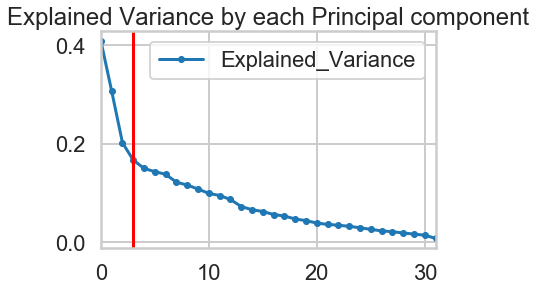

In [43]:
# your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

# Do the rest on your own :)
v = pca.explained_variance_
v = pd.DataFrame(v)
v.columns = ['Explained_Variance']
print(v)
ax = plt.gca()
v.plot(kind='line', ax=ax, marker='.')
plt.title('Explained Variance by each Principal component')
plt.axvline(x=3,color='red')
plt.show()

# Answer:
# The possible optimal dimension is 4 (pricipal components)

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [ ]:
# Your turn

### 1. Affinity propagation

In [44]:
# Affinity propagation
# by default, this gives 14 clusters, with centers at the 0th, 19th, 20th,... customer.
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(x_cols)
print(clustering.cluster_centers_indices_)
print(clustering.labels_)
print(clustering.cluster_centers_)
print(clustering.affinity_matrix_)
print(clustering.n_iter_)

[ 0 19 20 30 32 35 41 42 45 68 69 70 74 76]
[ 0 10  6  3  3 12  6  7  4  2  9 13  2 12  4  6  3  6  0  1  2  7  4  9
  6 10 11  4 12 13  3  7  4  8  0  5  4  2  4  5  6  6  7 12  0  8  2  3
 10 13  1 12 13  6  7  7  6  3  0  7 12  7 12  0  0 13  6 11  9 10 11 10
  8  3 12  3 13  3  3 13 11 10 11 13  2  5  0 10 10  7 12  0  7  3  1 12
  7 12  8 12]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [45]:
# Affinity propagation
# by changing the damping parameter (>=0.5 & <1), gives different number of clusters
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation(damping=0.8).fit(x_cols)
print(clustering.cluster_centers_indices_)
lab_aff = clustering.labels_
print(lab_aff)
print(clustering.cluster_centers_)
print(clustering.affinity_matrix_)
print(clustering.n_iter_)

[ 0 11 20 30 32 35 45 68 69 70 74]
[ 0  8  1  3  3 10  1  2  4  2  7  1  2 10  4  1  3  1  0  4  2  3  4  7
 10  8  9  4 10  3  3  5  4  6  0  5  4  2  4  5  1  1  8 10  0  6  2  3
  8  4  3 10  1  3 10  2  1  3  0 10 10  8 10  0  0  1 10  9  7  8  9  8
  6  3 10  3  1  3  3 10  9  8  9  1  2  5  0  8  8  8 10  0  3  3  9 10
  2 10  6 10]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [46]:
t = pd.Series(lab_aff)
t.value_counts()

10    17
3     16
1     12
8     11
4      9
2      9
0      9
9      6
6      4
5      4
7      3
dtype: int64

In [47]:
lab_aff = pd.DataFrame(lab_aff)
lab_aff.columns = ['label_aff_ID']
frames = [name_df, lab_aff]
tmp_df = pd.concat(frames,sort=False,axis=1)
display(tmp_df.head())

,customer_name,label_aff_ID
0,Adams,0
1,Allen,8
2,Anderson,1
3,Bailey,3
4,Baker,3


In [48]:
# merge new_df with the tmp_df dataframe by customer_name
tmp1_df = new_df.merge(tmp_df, left_on='customer_name', right_on='customer_name')
display(tmp1_df.head())
print(tmp1_df.shape)

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak,label_aff_ID
0,Smith,2,1,January,Pinot Noir,72,17,France,False,1
1,Smith,24,1,September,Pinot Noir,6,34,Italy,False,1
2,Rodriguez,2,1,January,Pinot Noir,72,17,France,False,1
3,Rodriguez,26,1,October,Pinot Noir,144,83,Australia,False,1
4,Martin,2,1,January,Pinot Noir,72,17,France,False,4


(324, 10)


For customers in the same label_aff_ID, examine each of the variables
The varietal in such a way that cluster are quite mixed.
cluster 1 is dominated by Pinot Noir, and 
cluster 4 and 10 are both dominated by Champagne.
this clustering doesn't separate the varietal very well
this clustering doesn't separate campaign very well

In [49]:
display(tmp1_df.groupby(['label_aff_ID'])['varietal'].value_counts())
display(tmp1_df.groupby(['label_aff_ID'])['campaign'].value_counts())
display(tmp1_df.groupby(['label_aff_ID'])['offer_id'].value_counts())
display(tmp1_df.groupby(['label_aff_ID'])['min_qty'].sum())
display(tmp1_df.groupby(['label_aff_ID'])['discount'].sum())
display(tmp1_df.groupby(['label_aff_ID'])['origin'].value_counts())
display(tmp1_df.groupby(['label_aff_ID'])['past_peak'].value_counts())

label_aff_ID  varietal          
0             Espumante              8
              Pinot Grigio           7
              Malbec                 6
              Prosecco               2
              Cabernet Sauvignon     1
              Merlot                 1
1             Pinot Noir            30
              Malbec                 2
              Champagne              1
              Chardonnay             1
              Prosecco               1
2             Espumante              7
              Malbec                 7
              Pinot Grigio           7
              Prosecco               5
              Merlot                 2
3             Prosecco              14
              Champagne              9
              Espumante              6
              Cabernet Sauvignon     4
              Pinot Noir             3
              Merlot                 2
              Pinot Grigio           2
              Malbec                 1
4             Champagne        

label_aff_ID  campaign 
0             November      8
              July          7
              December      6
              March         3
              May           1
1             October      11
              September    10
              January       9
              July          4
              April         1
2             March        12
              December      7
              November      7
              May           2
3             March        11
              July          5
              August        4
              February      4
              December      3
              May           3
              November      3
              October       3
              April         2
              June          2
              September     1
4             May           9
              August        7
              January       3
              October       3
              December      2
                           ..
7             May           1
8             Ap

label_aff_ID  offer_id
0             18           7
              29           7
              30           6
              7            2
              8            1
              13           1
              28           1
1             26          10
              24           9
              2            7
              17           4
              1            2
              10           1
              23           1
              27           1
2             8            7
              29           7
              30           7
              7            5
              13           2
3             7            9
              12           3
              3            2
              4            2
              8            2
              10           2
              16           2
              18           2
              19           2
              21           2
                          ..
9             23           1
              25           1
              26    

label_aff_ID
0      156
1     2478
2      168
3     1686
4     1968
5      300
6     1542
7      834
8     3480
9     1878
10    4434
Name: min_qty, dtype: int64

label_aff_ID
0     1507
1     1734
2     1588
3     2345
4     1768
5      795
6     1161
7      959
8     2300
9     1067
10    4048
Name: discount, dtype: int64

label_aff_ID  origin      
0             France          14
              Oregon           7
              Australia        2
              Chile            1
              South Africa     1
1             Australia       10
              France           9
              Italy            9
              Germany          4
              California       1
              New Zealand      1
              South Africa     1
2             France          14
              South Africa     7
              Australia        5
              Chile            2
3             Australia       13
              France           8
              California       6
              Oregon           5
              Germany          4
              Italy            2
              South Africa     2
              New Zealand      1
4             France          18
              Oregon           3
              Australia        2
              Italy            2
              Germany          1
              Ne

label_aff_ID  past_peak
0             False        22
              True          3
1             False        35
2             False        23
              True          5
3             False        25
              True         16
4             False        23
              True          5
5             False        15
              True          1
6             False        12
              True          6
7             False        13
              True          3
8             False        32
              True          5
9             False        14
              True          5
10            False        53
              True          8
Name: past_peak, dtype: int64

### 2. Spectral clustering

In [50]:
# Spectral clustering: choose 3 clusters for simplicity
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=123).fit(x_cols)
print(clustering.affinity_matrix_)
print(clustering.labels_)
lab_spe = clustering.labels_

[[1.00000000e+00 6.73794700e-03 6.73794700e-03 ... 9.11881966e-04
  9.11881966e-04 1.23409804e-04]
 [6.73794700e-03 1.00000000e+00 1.83156389e-02 ... 2.47875218e-03
  1.83156389e-02 2.47875218e-03]
 [6.73794700e-03 1.83156389e-02 1.00000000e+00 ... 2.47875218e-03
  2.47875218e-03 3.35462628e-04]
 ...
 [9.11881966e-04 2.47875218e-03 2.47875218e-03 ... 1.00000000e+00
  3.35462628e-04 3.35462628e-04]
 [9.11881966e-04 1.83156389e-02 2.47875218e-03 ... 3.35462628e-04
  1.00000000e+00 3.35462628e-04]
 [1.23409804e-04 2.47875218e-03 3.35462628e-04 ... 3.35462628e-04
  3.35462628e-04 1.00000000e+00]]
[2 0 1 2 0 0 1 2 0 2 0 1 2 0 0 1 0 1 2 0 2 0 0 0 1 0 0 0 0 1 2 0 0 0 2 2 0
 2 0 2 1 1 0 0 2 0 2 0 0 0 0 0 0 1 0 2 1 0 2 0 0 0 0 2 2 1 1 0 0 0 0 0 0 2
 0 2 1 0 0 1 0 0 0 1 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 0]


In [51]:
t = pd.Series(lab_spe)
t.value_counts()

0    58
2    26
1    16
dtype: int64

In [52]:
lab_spe = pd.DataFrame(lab_spe)
lab_spe.columns = ['label_spe_ID']
frames = [name_df, lab_spe]
tmp_df = pd.concat(frames,sort=False,axis=1)
display(tmp_df.head())

,customer_name,label_spe_ID
0,Adams,2
1,Allen,0
2,Anderson,1
3,Bailey,2
4,Baker,0


In [53]:
# merge new_df with the tmp_df dataframe by customer_name
tmp2_df = new_df.merge(tmp_df, left_on='customer_name', right_on='customer_name')
display(tmp2_df.head())
print(tmp2_df.shape)

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak,label_spe_ID
0,Smith,2,1,January,Pinot Noir,72,17,France,False,1
1,Smith,24,1,September,Pinot Noir,6,34,Italy,False,1
2,Rodriguez,2,1,January,Pinot Noir,72,17,France,False,1
3,Rodriguez,26,1,October,Pinot Noir,144,83,Australia,False,1
4,Martin,2,1,January,Pinot Noir,72,17,France,False,0


(324, 10)


In [54]:
display(tmp2_df.groupby(['label_spe_ID'])['varietal'].value_counts())
display(tmp2_df.groupby(['label_spe_ID'])['campaign'].value_counts())
display(tmp2_df.groupby(['label_spe_ID'])['offer_id'].value_counts())
display(tmp2_df.groupby(['label_spe_ID'])['min_qty'].sum())
display(tmp2_df.groupby(['label_spe_ID'])['discount'].sum())
display(tmp2_df.groupby(['label_spe_ID'])['origin'].value_counts())
display(tmp2_df.groupby(['label_spe_ID'])['past_peak'].value_counts())

label_spe_ID  varietal          
0             Champagne             80
              Cabernet Sauvignon    31
              Prosecco              28
              Espumante             18
              Malbec                15
              Chardonnay            14
              Merlot                13
              Pinot Noir             7
              Pinot Grigio           1
1             Pinot Noir            37
              Prosecco               2
              Champagne              1
              Chardonnay             1
              Malbec                 1
              Merlot                 1
2             Espumante             22
              Malbec                16
              Pinot Grigio          16
              Prosecco              13
              Merlot                 6
              Cabernet Sauvignon     1
Name: varietal, dtype: int64

label_spe_ID  campaign 
0             August       31
              December     27
              March        27
              February     22
              June         19
              May          17
              October      17
              April        16
              January      13
              July          8
              November      6
              September     4
1             October      13
              September    13
              January       7
              July          7
              April         1
              June          1
              May           1
2             March        24
              November     17
              December     16
              July         11
              May           6
Name: campaign, dtype: int64

label_spe_ID  offer_id
0             22          21
              31          17
              11          13
              4           12
              6           12
              9           10
              1            9
              8            9
              14           9
              27           8
              3            6
              7            6
              10           6
              15           6
              20           6
              25           6
              30           6
              19           5
              28           5
              2            4
              5            4
              12           4
              16           4
              21           4
              23           4
              32           4
              18           3
              26           3
              29           1
1             24          12
              26          12
              17           7
              2            6
              1     

label_spe_ID
0    15654
1     2820
2      450
Name: min_qty, dtype: int64

label_spe_ID
0    12896
1     2241
2     4135
Name: discount, dtype: int64

label_spe_ID  origin      
0             France          88
              Chile           31
              Oregon          15
              California      14
              Australia       13
              South Africa    13
              Italy           12
              New Zealand     12
              Germany          9
1             Australia       13
              Italy           12
              France           7
              Germany          7
              California       2
              New Zealand      1
              South Africa     1
2             France          33
              Australia       13
              Oregon          11
              South Africa    11
              Chile            6
Name: origin, dtype: int64

label_spe_ID  past_peak
0             False        164
              True          43
1             False         43
2             False         60
              True          14
Name: past_peak, dtype: int64

### 3. Agglomerative clustering 

In [55]:
# Agglomerative clustering 
# linkage{“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
# Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
# The algorithm will merge the pairs of cluster that minimize this criterion.

# ward minimizes the variance of the clusters being merged.
# average uses the average of the distances of each observation of the two sets.
# complete or maximum linkage uses the maximum distances between all observations of the two sets.
# single uses the minimum of the distances between all observations of the two sets.

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(x_cols)
print(clustering.labels_)
lab_agg = clustering.labels_
#print(clustering.n_leaves_)
#print(clustering.children_)

[1 0 2 1 0 0 2 1 0 1 0 2 1 0 1 2 0 2 1 0 1 1 0 0 2 0 0 0 0 2 1 1 0 0 1 1 0
 1 0 1 2 2 1 0 1 0 1 0 0 0 0 0 2 2 0 1 2 1 1 0 0 1 0 1 1 2 2 0 0 0 0 0 0 1
 0 1 2 0 1 2 0 0 0 2 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0]


In [56]:
t = pd.Series(lab_agg)
t.value_counts()

0    49
1    34
2    17
dtype: int64

In [57]:
lab_agg = pd.DataFrame(lab_agg)
lab_agg.columns = ['label_agg_ID']
frames = [name_df, lab_agg]
tmp_df = pd.concat(frames,sort=False,axis=1)
display(tmp_df.head())

,customer_name,label_agg_ID
0,Adams,1
1,Allen,0
2,Anderson,2
3,Bailey,1
4,Baker,0


In [58]:
# merge new_df with the tmp_df dataframe by customer_name
tmp3_df = new_df.merge(tmp_df, left_on='customer_name', right_on='customer_name')
display(tmp3_df.head())
print(tmp3_df.shape)

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak,label_agg_ID
0,Smith,2,1,January,Pinot Noir,72,17,France,False,2
1,Smith,24,1,September,Pinot Noir,6,34,Italy,False,2
2,Rodriguez,2,1,January,Pinot Noir,72,17,France,False,2
3,Rodriguez,26,1,October,Pinot Noir,144,83,Australia,False,2
4,Martin,2,1,January,Pinot Noir,72,17,France,False,0


(324, 10)


In [59]:
display(tmp3_df.groupby(['label_agg_ID'])['varietal'].value_counts())
display(tmp3_df.groupby(['label_agg_ID'])['campaign'].value_counts())
display(tmp3_df.groupby(['label_agg_ID'])['offer_id'].value_counts())
display(tmp3_df.groupby(['label_agg_ID'])['min_qty'].sum())
display(tmp3_df.groupby(['label_agg_ID'])['discount'].sum())
display(tmp3_df.groupby(['label_agg_ID'])['origin'].value_counts())
display(tmp3_df.groupby(['label_agg_ID'])['past_peak'].value_counts())

label_agg_ID  varietal          
0             Champagne             77
              Cabernet Sauvignon    31
              Prosecco              24
              Chardonnay            14
              Malbec                13
              Merlot                13
              Espumante             11
              Pinot Noir             6
              Pinot Grigio           1
1             Espumante             29
              Malbec                17
              Prosecco              17
              Pinot Grigio          16
              Merlot                 6
              Champagne              3
              Cabernet Sauvignon     1
2             Pinot Noir            38
              Malbec                 2
              Prosecco               2
              Champagne              1
              Chardonnay             1
              Merlot                 1
Name: varietal, dtype: int64

label_agg_ID  campaign 
0             August       30
              December     26
              February     22
              March        20
              June         19
              October      16
              April        15
              May          15
              January      11
              July          6
              November      6
              September     4
1             March        31
              December     17
              November     17
              July         13
              May           8
              April         1
              August        1
              October       1
2             October      13
              September    13
              January       9
              July          7
              April         1
              June          1
              May           1
Name: campaign, dtype: int64

label_agg_ID  offer_id
0             22          21
              31          17
              4           12
              11          12
              6           11
              9           10
              14           9
              1            8
              27           7
              3            6
              15           6
              20           6
              25           6
              7            5
              10           5
              19           5
              28           5
              30           5
              5            4
              8            4
              16           4
              23           4
              32           4
              2            3
              12           3
              21           3
              26           3
              18           1
              29           1
1             30          17
              8           16
              29          16
              7           14
              18    

label_agg_ID
0    15012
1      948
2     2964
Name: min_qty, dtype: int64

label_agg_ID
0    11960
1     4998
2     2314
Name: discount, dtype: int64

label_agg_ID  origin      
0             France          84
              Chile           30
              Oregon          13
              California      12
              Italy           12
              Australia       11
              New Zealand     11
              Germany          9
              South Africa     8
1             France          35
              South Africa    16
              Australia       15
              Oregon          13
              Chile            7
              California       2
              New Zealand      1
2             Australia       13
              Italy           12
              France           9
              Germany          7
              California       2
              New Zealand      1
              South Africa     1
Name: origin, dtype: int64

label_agg_ID  past_peak
0             False        148
              True          42
1             False         74
              True          15
2             False         45
Name: past_peak, dtype: int64

### 4. DBSCAN 

In [60]:
# DBSCAN 
# only eps = 1 gives non-trivial clustering
# only min_samples < 10 are interesting
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=3).fit(x_cols)
print(clustering.labels_)
lab_dbscan = clustering.labels_
print(clustering.components_)
print(clustering.core_sample_indices_)

[ 0  2  1  0 -1 -1  1  0 -1  0 -1  1  0 -1 -1  1 -1  1  0 -1  0  0 -1 -1
  1 -1 -1 -1  2 -1  0 -1 -1 -1 -1  3 -1  0 -1  3  1  1  0 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1  1 -1  0  1  0  0 -1  2  0 -1  0  0 -1  1 -1 -1  2 -1  2
 -1  0  2  0  1 -1 -1  1 -1 -1 -1  1  0  3  0 -1 -1  0 -1  0 -1  0 -1 -1
  0 -1 -1 -1]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[ 0  2  3  6  7  9 11 12 15 17 18 20 21 24 28 30 35 37 40 41 42 46 53 55
 56 58 61 63 64 66 69 74 75 76 79 84 86 89 93 96]


In [61]:
t = pd.Series(lab_dbscan)
t.value_counts()

-1    51
 0    26
 1    14
 2     6
 3     3
dtype: int64

In [62]:
lab_dbscan = pd.DataFrame(lab_dbscan)
lab_dbscan.columns = ['lab_dbscan_ID']
frames = [name_df, lab_dbscan]
tmp_df = pd.concat(frames,sort=False,axis=1)
display(tmp_df.head())

,customer_name,lab_dbscan_ID
0,Adams,0
1,Allen,2
2,Anderson,1
3,Bailey,0
4,Baker,-1


In [63]:
# merge new_df with the tmp_df dataframe by customer_name
tmp4_df = new_df.merge(tmp_df, left_on='customer_name', right_on='customer_name')
display(tmp4_df.head())
print(tmp4_df.shape)

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak,lab_dbscan_ID
0,Smith,2,1,January,Pinot Noir,72,17,France,False,1
1,Smith,24,1,September,Pinot Noir,6,34,Italy,False,1
2,Rodriguez,2,1,January,Pinot Noir,72,17,France,False,1
3,Rodriguez,26,1,October,Pinot Noir,144,83,Australia,False,1
4,Martin,2,1,January,Pinot Noir,72,17,France,False,-1


(324, 10)


In [64]:
display(tmp4_df.groupby(['lab_dbscan_ID'])['varietal'].value_counts())
display(tmp4_df.groupby(['lab_dbscan_ID'])['campaign'].value_counts())
display(tmp4_df.groupby(['lab_dbscan_ID'])['offer_id'].value_counts())
display(tmp4_df.groupby(['lab_dbscan_ID'])['min_qty'].sum())
display(tmp4_df.groupby(['lab_dbscan_ID'])['discount'].sum())
display(tmp4_df.groupby(['lab_dbscan_ID'])['origin'].value_counts())
display(tmp4_df.groupby(['lab_dbscan_ID'])['past_peak'].value_counts())

lab_dbscan_ID  varietal          
-1             Champagne             75
               Cabernet Sauvignon    32
               Prosecco              29
               Malbec                16
               Espumante             15
               Merlot                15
               Chardonnay            10
               Pinot Noir            10
               Pinot Grigio           3
 0             Espumante             19
               Malbec                14
               Pinot Grigio          14
               Prosecco              13
               Merlot                 2
               Champagne              1
 1             Pinot Noir            34
 2             Champagne              5
               Chardonnay             5
 3             Espumante              6
               Merlot                 3
               Malbec                 2
               Prosecco               1
Name: varietal, dtype: int64

lab_dbscan_ID  campaign 
-1             August       31
               December     24
               March        23
               February     22
               June         20
               May          18
               October      18
               January      15
               April        13
               November      9
               July          8
               September     4
 0             March        24
               December     14
               November     14
               July          7
               May           3
               October       1
 1             September    12
               October      10
               July          7
               January       5
 2             April         4
               December      3
               July          1
               October       1
               September     1
 3             March         4
               July          3
               May           3
               December      2
Name: campaign

lab_dbscan_ID  offer_id
-1             22          21
               31          14
               11          13
               4           12
               6           12
               1           10
               14           9
               10           7
               27           7
               3            6
               7            6
               9            6
               15           6
               20           6
               25           6
               28           6
               30           6
               2            5
               8            5
               16           5
               26           5
               5            4
               12           4
               18           4
               19           4
               21           4
               23           4
               32           4
               29           3
               13           1
 0             29          14
               30          14
               7

lab_dbscan_ID
-1    15366
 0      510
 1     1956
 2     1020
 3       72
Name: min_qty, dtype: int64

lab_dbscan_ID
-1    12769
 0     3601
 1     1652
 2      688
 3      562
Name: discount, dtype: int64

lab_dbscan_ID  origin      
-1             France          90
               Chile           28
               California      16
               Oregon          16
               Australia       15
               Italy           12
               New Zealand     11
               South Africa     9
               Germany          8
 0             France          28
               Australia       13
               South Africa    12
               Oregon           7
               Chile            2
               New Zealand      1
 1             Italy           12
               Australia       10
               Germany          7
               France           5
 2             Chile            4
               France           3
               Germany          1
               New Zealand      1
               South Africa     1
 3             Chile            3
               Oregon           3
               South Africa     3
               France           2
               Austr

lab_dbscan_ID  past_peak
-1             False        161
               True          44
 0             False         51
               True          12
 1             False         34
 2             False         10
 3             False         11
               True           1
Name: past_peak, dtype: int64

## Answers:
Based on the limited explorations of these 5 clustering methods. I compared KMeans with 3 clusters, 
Affinity propagation with 8 clusters (only damping can be tuned), 
Spectral clustering with 3 clusters (can specifiy n_clusters), 
Agglomerative clustering with 3 clusters (can specifiy n_clusters), 
and DBSCAN with 5 clusters (tune eps and min_samples). 
I roughly inspected the "purity" of each attribute (varietal, offer_id, dicount, etc.) within each cluster produced
by different algorithms, and use this "purity" as a metric to measure the performance of each algorithm. 
I found that 3 clusters are better than 5 (DBSCAN) or 8 clusters (Affinity propagation) for this small dataset (100 rows indicating 100 customers)
and Spectral clustering with 3 clusters gives a pretty good separation of varietal, discount and min_qty.
Agglomerative clustering and KMeans have similar performance as Spectral clustering.